<a href="https://colab.research.google.com/github/trivedisunita/MLLearning/blob/main/Wine_Quality__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part-1 Understand the Problem and Dataset

We have to predict the quality of wine for given dataset.by using machine learning model, data analysis, datapreprocessing methods we use fetures to predict the quality. quality is given on scale of 0-10.

#Import Necessary Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Load the data set. data set was given for the refrence. i have downloaded it on my local machine.

In [147]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/wine_quality_data.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [148]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


#Data Exploration

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [150]:
#to know the shape of dataset
data.shape

(1599, 12)

In [151]:
#to check statistical summery of our data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [152]:
#so basically by visulize statastics table we relize that some of the variable like 'fixed acidity',
#'residual sugar', 'free sulphur dioxide', 'total sulfur dioxide' have some outlier datapints.
#we have to detect and provide solution for them.


Missing value check in dataset

In [153]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

so there is three columns having missing value they are 'total sulfur dioxide', 'ph', 'quality'. let's check for that

In [154]:
data.isnull().sum().sum()

3

we can see here there are three missing value in three columns.we can replace the missing value we by using Mean method.

In [155]:
data['total sulfur dioxide'] = data['total sulfur dioxide'].fillna(data['total sulfur dioxide'].mean())
data['pH'] = data['pH'].fillna(data['pH'].mean())
data['quality'] = data['quality'].fillna(data['quality'].mean())

In [156]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Cool! so we have dealed with missing value in dataset.False indicate here there is no missing value in dataset now.

In [157]:
#quality is target feature. we have to check how many different values quality features does have
#to check this we use unique().
data['quality'].unique()

array([5.        , 6.        , 7.        , 4.        , 5.63642053,
       8.        , 3.        ])

# Data Visualization

<ipython-input-158-c6193a0a3700>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar= sns.distplot(data['quality'])


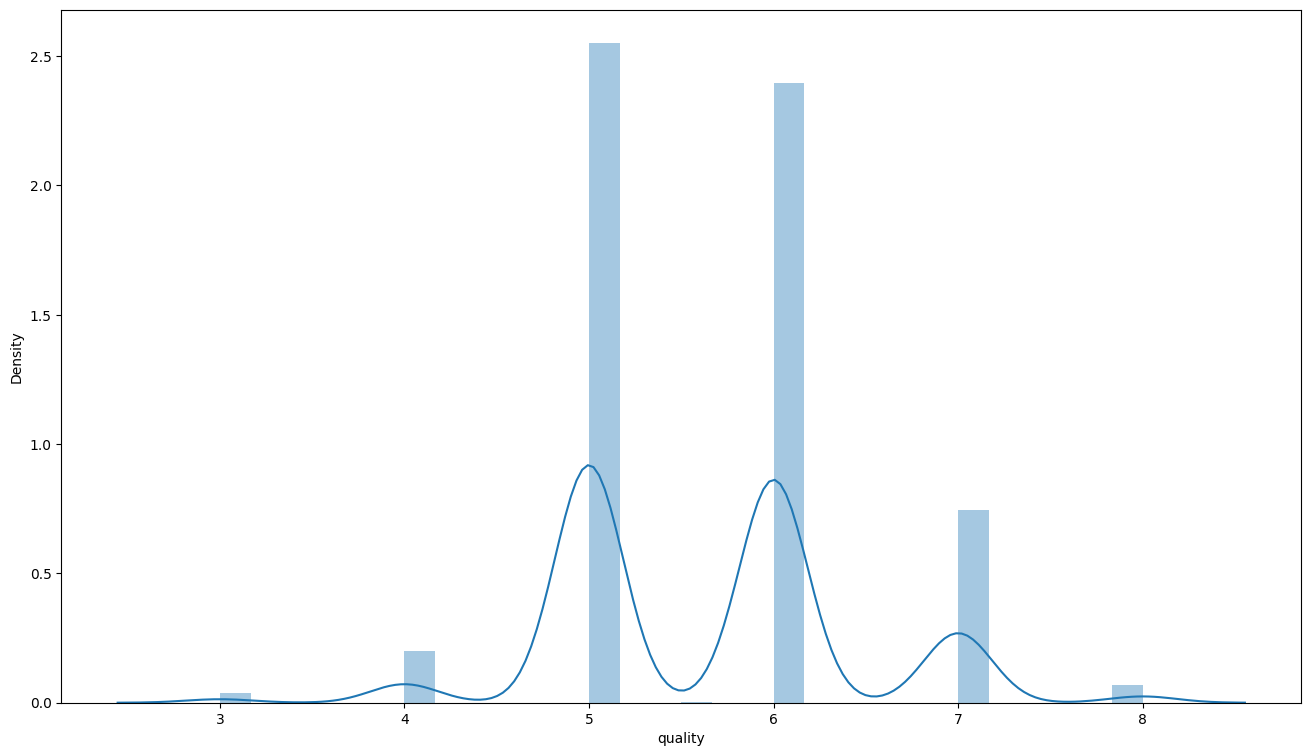

In [158]:
#dist plot
plt.figure(figsize=(16,9))
bar= sns.distplot(data['quality'])
plt.show()

so most of the quality lie between 5-6 . few are quality of scale of 7 also. and very few are quality scale of 8.


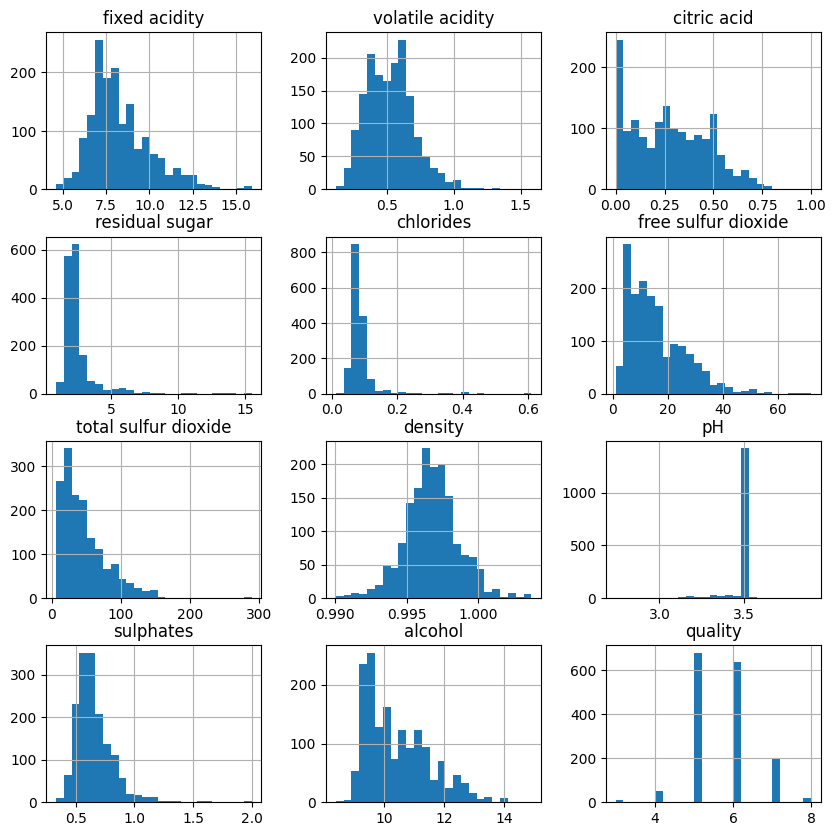

In [159]:
data.hist(bins =25, figsize=(10,10))
plt.show()

This histograph shows how data is easily distributed on features.

<Axes: title={'center': 'Correlation with quality'}>

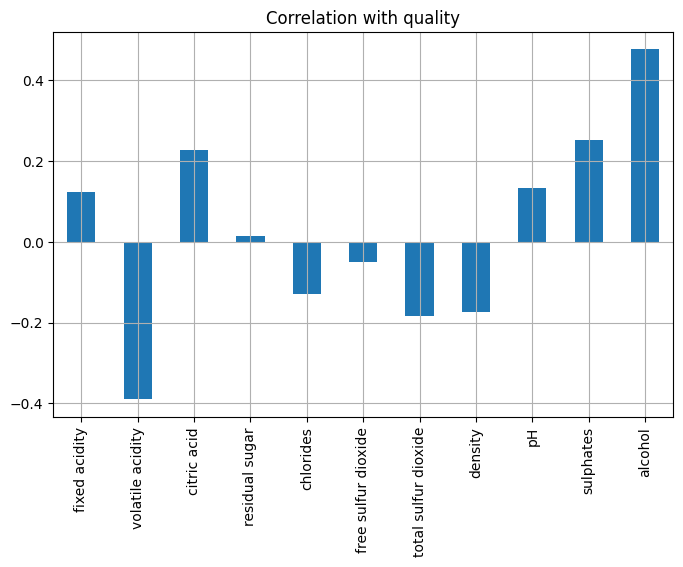

In [160]:
#Correlation Matrix
dataset = data.drop(columns='quality')
dataset.shape
dataset.corrwith(data['quality']).plot.bar(figsize=(8,5), title='Correlation with quality', grid=True)

by visualizing this we can get insight that some of the independant variable is highly corelated with quality parameter. some of are positive correlated and some of are negaative correlated.

<Axes: >

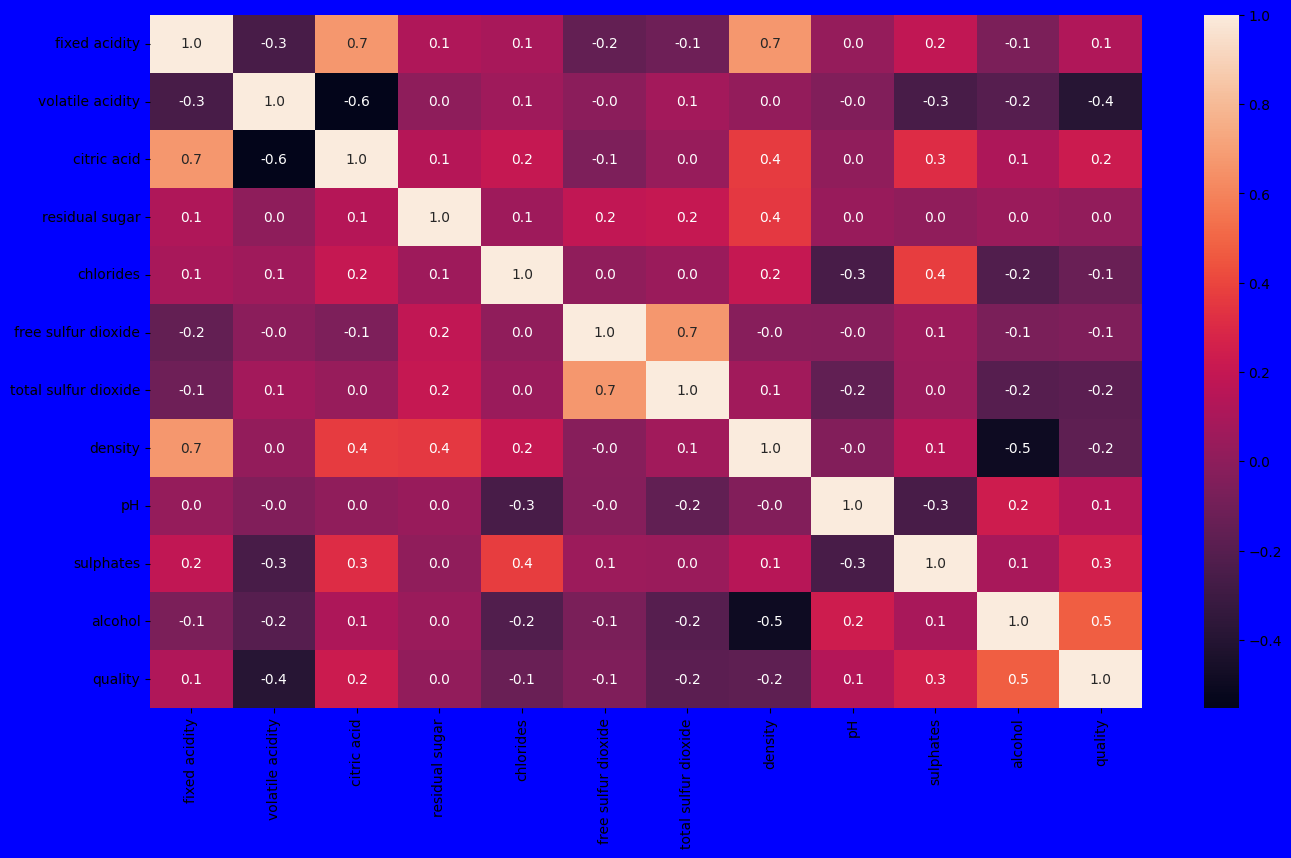

In [161]:
#we will see more correlation among the features through hetamap
plt.figure(figsize= (16,9), facecolor ='blue')
sns.heatmap(data.corr(),fmt = '.1f', annot = True)

we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.because relationship among them is equal they equally impact on model accuracy so, we delete one of them.
As we can see in heatmap some of features are more correlated then other. very dark color shows negative correlation with quality whereas light color shows positive correlation.


In [162]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

in the program we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, we find the feature total sulfur dioxide which satisfy the condition.

In [163]:
data=data.drop('total sulfur dioxide',axis=1)

In [164]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5.0


#Data Preprocessing


In [165]:
x = data.iloc[:, :-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4


In [166]:
x.shape

(1599, 10)

In [167]:
#y = data['quality']
#y.head()

In [168]:
#As we can see quality columns has 7 unique value
data['quality'].nunique()

7

In [169]:
#Change the quality columns values into two category good quality and bad quality. wines having value
#7 or greater then this will be in good quality category and less then value 7 will come in bad quality wines
#for this we make a function in python to categorize the value
y = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
y.head()


0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [200]:
y.unique()

array([0, 1])

In [201]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [170]:
y.shape

(1599,)

In [171]:
#Feature Scaleing
#To normalize the data we do feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [172]:
#split the dataset for training and testing purpose
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [173]:
x_train.shape

(1279, 10)

In [174]:
y_train.shape

(1279,)

In [175]:
x_test.shape

(320, 10)

In [176]:
y_test.shape

(320,)

In [177]:
x_train = scaler.fit_transform(x_train)
x_train


array([[0.36283186, 0.39041096, 0.31      , ..., 0.67241379, 0.22699387,
        0.49230769],
       [0.13274336, 0.06164384, 0.4       , ..., 0.67241379, 0.13496933,
        0.53846154],
       [0.55752212, 0.18493151, 0.47      , ..., 0.67241379, 0.23312883,
        0.21538462],
       ...,
       [0.2300885 , 0.34246575, 0.06      , ..., 0.67241379, 0.10429448,
        0.16923077],
       [0.2920354 , 0.05479452, 0.35      , ..., 0.67241379, 0.26380368,
        0.53846154],
       [0.10619469, 0.11643836, 0.26      , ..., 0.67241379, 0.10429448,
        0.78461538]])

In [178]:
x_test = scaler.fit_transform(x_test)
x_test

array([[0.25714286, 0.44221106, 0.10126582, ..., 0.96      , 0.32038835,
        0.21428571],
       [0.26666667, 0.38190955, 0.21518987, ..., 0.7       , 0.14563107,
        0.19642857],
       [0.54285714, 0.55276382, 0.27848101, ..., 0.96      , 0.63106796,
        0.26785714],
       ...,
       [0.31428571, 0.48241206, 0.3164557 , ..., 0.96      , 0.19417476,
        0.25      ],
       [0.36190476, 0.15075377, 0.49367089, ..., 0.96      , 0.34951456,
        0.5       ],
       [0.39047619, 0.64824121, 0.05063291, ..., 0.96      , 0.2038835 ,
        0.23214286]])


# Building the Model

In [179]:
#RANDOM FOREST CLASSIFIER
#As we can see quality can be predicted as good or bad so we are using random forest classifier here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [180]:
#making instanvce of random forest classifier
rfc = RandomForestClassifier()
model = rfc.fit(x_train, y_train)
y_pred= rfc.predict(x_test)

In [181]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
result = pd.DataFrame([['RandomForestClss',acc,pre,f1_sc ]],
                      columns =['Model', 'Accuracy_sc', 'Precisi_sc','F1_sc'])

In [182]:
result

,Model,Accuracy_sc,Precisi_sc,F1_sc
0,RandomForestClss,0.84375,0.461538,0.418605


In [183]:
acc

0.84375

so the accuracy we got here is 84 percent so we can say model is good fit for prediction. let's validate our model by cross validation.


#Cross Validation

In [184]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, X=x_train,y=y_train,cv=10)

In [185]:
accurecy = accuracies.mean()*100
standard_dev = accuracies.std()*100
print(f'Accurecy is {accurecy} %')
print(f'Standard Deviation is {standard_dev}%')

Accurecy is 90.85322342519684 %
Standard Deviation is 2.8366784443971023%


In [186]:
#so here we can see by using cross validation on Random Forest classifier we can get accuracy of 90% which
#shows the best model fit.
#Let's use another ML model SVM

In [187]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [188]:
y_pred2 = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred2)
acc

0.853125

Cross validation for SVM

In [189]:
accuracies = cross_val_score(estimator=classifier, X=x_train,y=y_train,cv=10)
accurecy = accuracies.mean()*100
standard_dev = accuracies.std()*100
print(f'Accurecy is {accurecy} %')
print(f'Standard Deviation is {standard_dev}%')

Accurecy is 86.70829232283465 %
Standard Deviation is 0.03137303149606252%


In [190]:
#As we can see by cross validation accuracy score is 86% so we choose random forest classifier here.

predict a single instance

In [214]:
input_data = (10.3, 0.32, 0.45, 6.4, 0.073,	5, 0.9964,3.52,0.82,12.6)
input_data_array = np.array(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = rfc.predict(input_data_reshaped)
print(prediction)

if prediction[0]== 0:
  print('Bad Quality Wine')
else:
  print('Good Quality Wine')

[0]
Bad Quality Wine
